<a href="https://colab.research.google.com/github/Monikacg/Signal-Manipulation/blob/master/Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tftb.generators import amexpos, fmconst, sigmerge, noisecg

# Generate a noisy transient signal.
transsig = amexpos(64, kind='unilateral') * fmconst(64)[0]
signal = np.hstack((np.zeros((100,)), transsig, np.zeros((92,))))
signal = sigmerge(signal, noisecg(256), -5)
fig, ax = plt.subplots(2, 1)
ax1, ax2 = ax
ax1.plot(np.real(signal))
ax1.grid()
ax1.set_title('Noisy Transient Signal')
ax1.set_xlabel('Time')
ax1.set_xlim((0, 256))
ax1.set_ylim((np.real(signal).max(), np.real(signal.min())))

# Energy spectrum of the signal
dsp = np.fft.fftshift(np.abs(np.fft.fft(signal)) ** 2)
ax2.plot(np.arange(-128, 128, dtype=float) / 256, dsp)
ax2.set_title('Energy spectrum of noisy transient signal')
ax2.set_xlabel('Normalized frequency')
ax2.grid()
ax2.set_xlim(-0.5, 0.5)

plt.subplots_adjust(hspace=0.5)

plt.show()


ModuleNotFoundError: ignored

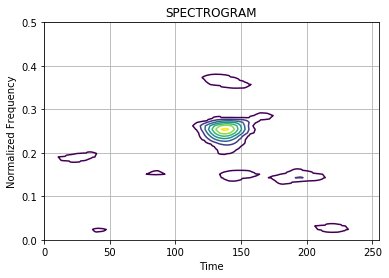

In [ ]:
from scipy.signal import hamming
from tftb.processing import Spectrogram
fwindow = hamming(65)
spec = Spectrogram(signal, n_fbins=128, fwindow=fwindow)
spec.run()
spec.plot(kind="contour", threshold=0.1, show_tf=False)